## Tree_feature_importance for the models

C:\Users\Addisu\AppData\Local\Temp\ipykernel_69848\3219601805.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  raw_data = pd.read_csv(file, parse_dates = ['POINT'],


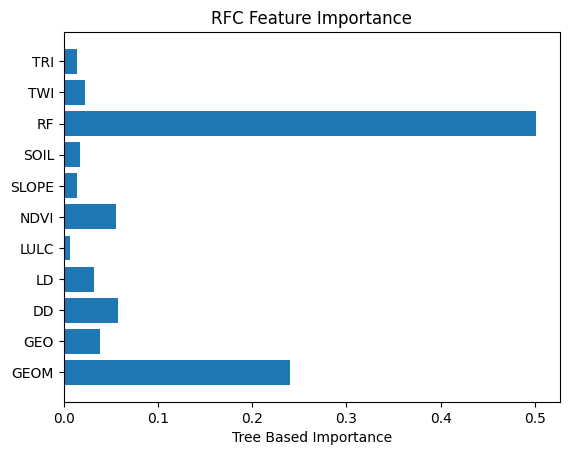

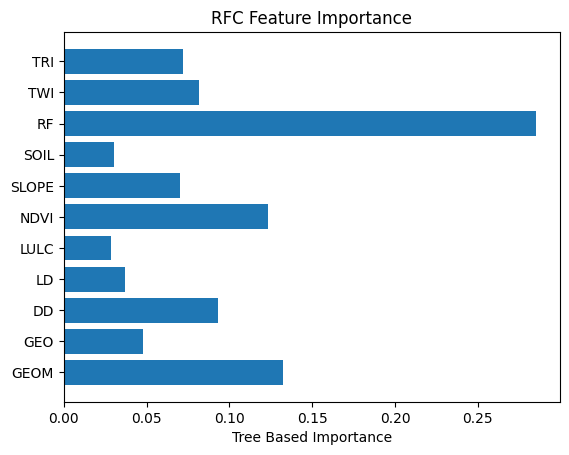

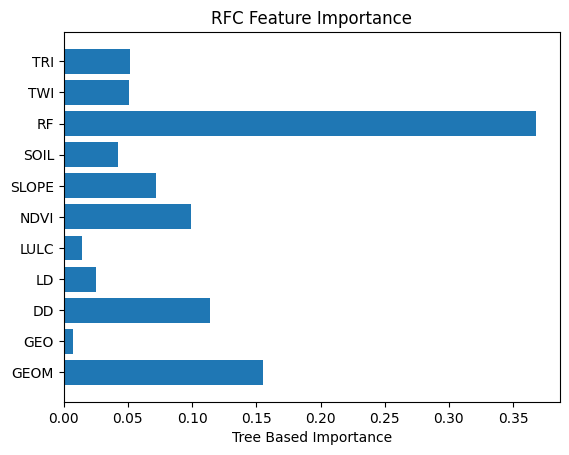

In [1]:
import pandas as pd        
#Step 1: Read and explore data
file='E:/kidi file e/PAPERS/GWPM/L.csv'
raw_data = pd.read_csv(file, parse_dates = ['POINT'],
                       index_col = 'POINT')
df = raw_data.copy()
df

import numpy as np
# Replace all -9999s with NaNs to make it easier to work with
df.replace(to_replace=-9999, value=np.nan, inplace=True)
# Check missing values
df.isnull().sum()


# Check missing values
df.isnull().sum()
# Replace missing values by interpolation

def replace_missing (attribute):
    return attribute.interpolate(inplace=True)
replace_missing(df['GEOM'])
replace_missing(df['DD'])
replace_missing(df['LD'])
replace_missing(df['LULC'])
replace_missing(df['NDVI'])
replace_missing(df['SLOPE '])
replace_missing(df['SOIL'])
replace_missing(df['RF'])
replace_missing(df['TWI'])
replace_missing(df['TRI'])
replace_missing(df['GWPZ'])
replace_missing(df['GEO'])

df



import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn import metrics, svm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes  import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import cohen_kappa_score


# Read data from  csv files
X = df.drop(["GWPZ"], axis=1)
y = df["GWPZ"]
Input_data_features = X.values
Input_data_labels =y.values


# standardize input features X and output labels Y
#scaler_standardized_X = StandardScaler()
#Input_data_features = scaler_standardized_X.fit_transform(Input_data_features)

#scaler_standardized_Y = StandardScaler()
#Input_data_labels = scaler_standardized_Y.fit_transform(Input_data_labels)


# Split dataset into train, validation, an test
index_X_Train_End = int(0.7 * len(Input_data_features))
index_X_Validation_End = int(0.9 * len(Input_data_features))

X_train = Input_data_features[0: index_X_Train_End]
X_valid = Input_data_features[index_X_Train_End: index_X_Validation_End]
X_test = Input_data_features[index_X_Validation_End:]

Y_train = Input_data_labels[0: index_X_Train_End]
Y_valid = Input_data_labels[index_X_Train_End: index_X_Validation_End]
Y_test = Input_data_labels[index_X_Validation_End:]

#import uuid
#import shap
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import permutation_importance

def tree_feature_importance(mdl, ft_cols, viz=True):
    """
    This function will identify the feature importance associated with
    tree based models.
    
    params:
        mdl (Model) : The model you want to identify coeficient importance on
        ft_cols (List) : The list of feature names 
        viz (Boolean) : True if you want to vizualize the results, False otherwise
        
    returns:
        This function will return a dictionary with keys as feature names and values
        being the coefficient associated to that feature.
    """
    imp = mdl.feature_importances_
    importance_dct = dict(zip(ft_cols, imp))
    
    if viz:
        plt.clf()
        plt.barh(list(importance_dct.keys()), list(importance_dct.values()))
        plt.xlabel("Tree Based Importance")
        plt.title("RFC Feature Importance")
        plt.show()
    
    return importance_dct
ft_cols = ['GEOM', 'GEO', 'DD', 'LD', 'LULC','NDVI','SLOPE','SOIL','RF','TWI','TRI']
gbr = GradientBoostingClassifier().fit(X_train, Y_train)
model_randomForest = RandomForestClassifier()
rf=model_randomForest.fit(X_train, Y_train)
ti = tree_feature_importance(gbr, ft_cols, True)
ri=tree_feature_importance(rf, ft_cols, True)
Model_DecisionTreeClassifier = DecisionTreeClassifier()
d=Model_DecisionTreeClassifier.fit(X_train, Y_train)
di=tree_feature_importance(d, ft_cols, True)



